In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [4]:
data = pd.read_csv('fruits_dataset.data')
data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
data.isnull().sum()

fruit_label      0
fruit_name       0
fruit_subtype    0
mass             0
width            0
height           0
color_score      0
dtype: int64

In [10]:
data.value_counts("fruit_name")

fruit_name
apple       19
orange      19
lemon       16
mandarin     5
Name: count, dtype: int64

In [19]:
features = data.iloc[:, 3:7]
label = data.iloc[:, 1]
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
  features,label, test_size=0.2, random_state=0
)
print("Number of train data" ,X_train.shape[0])
print("Number of test data", y_test.shape[0])


Number of train data 47
Number of test data 12


In [20]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = "distance")
knn.fit(X_train, y_train)
train_acc = knn.score(X_train, y_train)
print("The accuracy of the KNN classifier on training data is : {:.3f}".format(train_acc))

The accuracy of the KNN classifier on training data is : 1.000


In [40]:
knn_test_acc = knn.score(X_test, y_test)
print("The accuracy of KNN classifier on test data is : {:.3f}".format(knn_test_acc))

The accuracy of KNN classifier on test data is : 0.667


In [29]:
import pickle
with open('knn_model.pickle', "wb") as f:
  pickle.dump(knn, f)

In [41]:
with open ('knn_model.pickle', 'rb') as f:
  model = pickle.load(f)

new_data =[80, 5.8, 4.5, 0.77]
X = np.array([new_data])
prediction = model.predict(X)
print("Prediction of species: {}".format(prediction))

Prediction of species: ['mandarin']


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


[Text(0.5, 1.0, 'Mass and Color Score')]

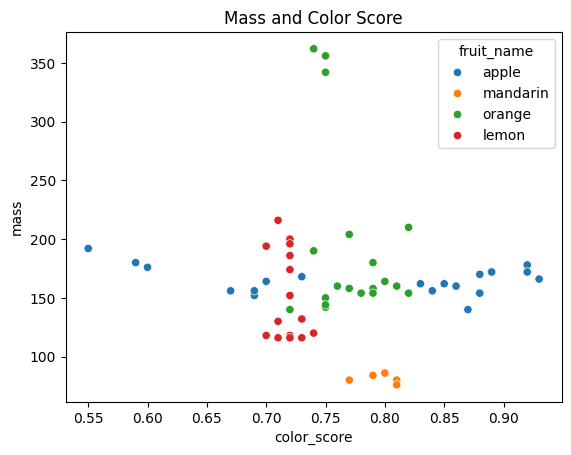

In [48]:
figure1 = sns.scatterplot(x = "color_score", y = "mass", hue="fruit_name", data=data)
figure1.set(title="Mass and Color Score")

[Text(0.5, 1.0, 'Height and Width Score')]

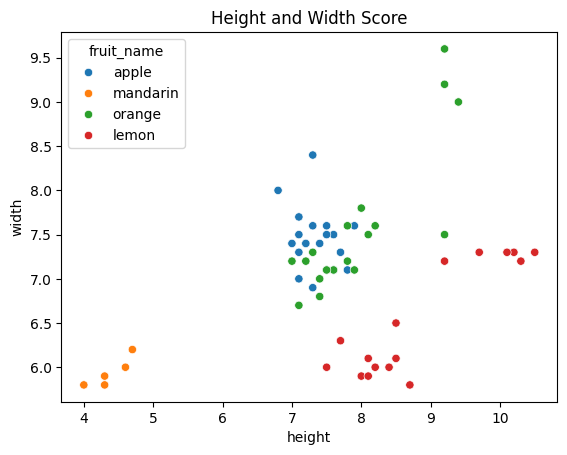

In [38]:
figure2 = sns.scatterplot(x="height", y='width', hue="fruit_name", data=data)
figure2.set(title="Height and Width Score")

Text(0.5, 1.0, 'Confusion Matrix')

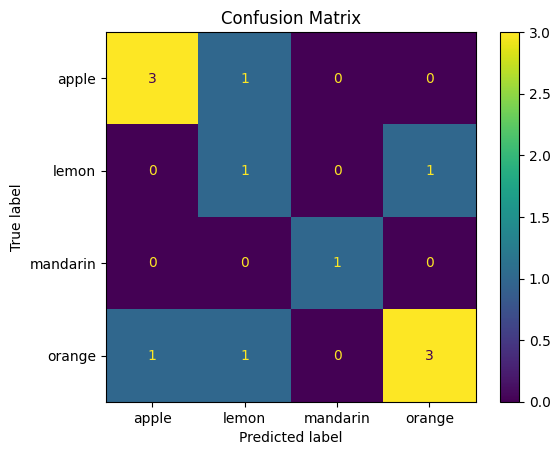

In [44]:
fig3 = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
fig3.ax_.set_title("Confusion Matrix")